# **_Apartment Prices Prediction Craiova_**

This notebook is made for predicting the mean apartment price in Craiova for the next 10-20 years

In [41]:
#modules
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv("merged_data/craiova_apartment_prices_1900_2025_gen8.csv")

In [43]:
df.head()

,date,price_per_sqm
0,1900-01-01,626.16
1,1901-01-01,629.21
2,1902-01-01,632.73
3,1903-01-01,636.76
4,1904-01-01,639.81


In [44]:
df.tail()

,date,price_per_sqm
267,2025-06-01,10293.04
268,2025-07-01,10247.70
269,2025-08-01,10282.97
270,2025-09-01,10429.07
271,2025-10-01,10429.07


## **EDA**

In [45]:
df.describe()

,price_per_sqm
count,272.000000
mean,3613.435331
std,2746.433345
min,597.300000
25%,842.527500
50%,3229.705000
75%,5544.935000
max,10429.070000



### 1. Trend chart 1900-2025


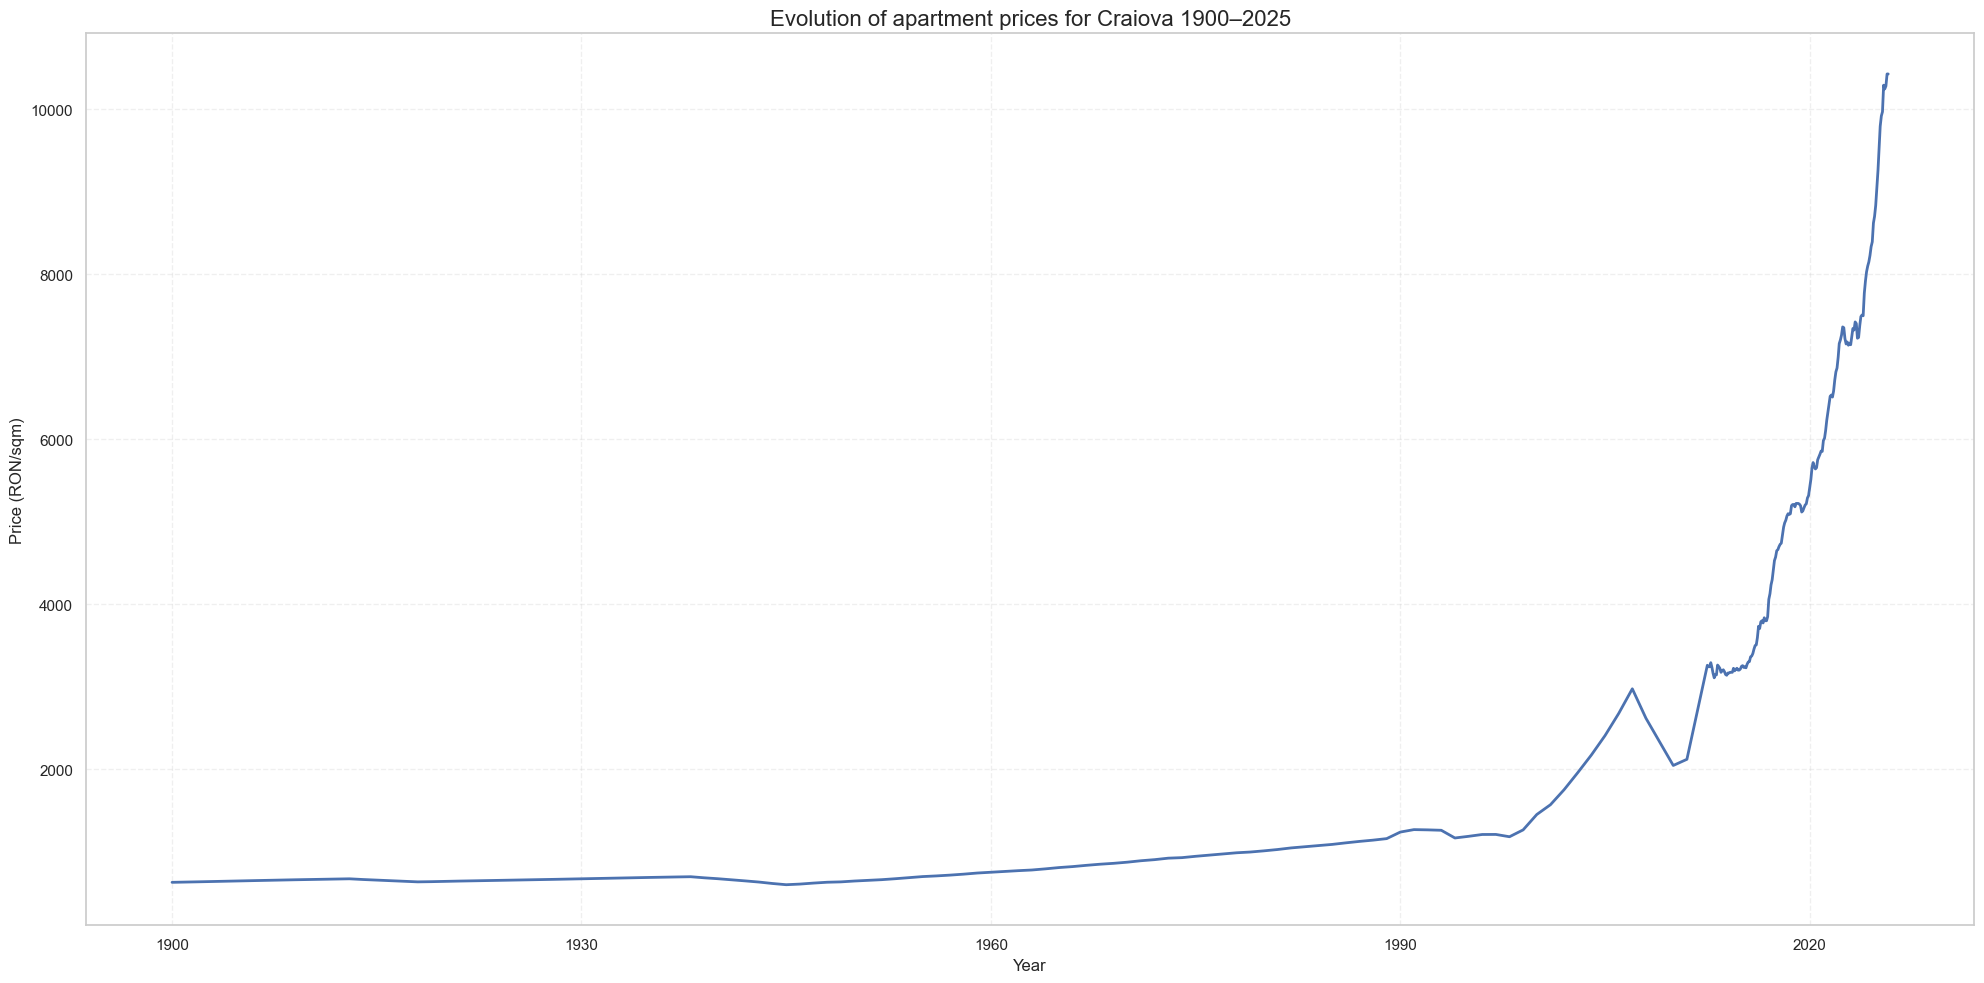

In [46]:
df['date'] = pd.to_datetime(df['date'])

years = [1900, 1930, 1960, 1990, 2020]
ticks = [pd.Timestamp(f"{y}-01-01") for y in years]

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df['date'], df['price_per_sqm'], linewidth=2)

ax.set_title("Evolution of apartment prices for Craiova 1900–2025", fontsize=16)
ax.set_xlabel("Year")
ax.set_ylabel("Price (RON/sqm)")

ax.set_xticks(ticks)
ax.set_xticklabels([str(y) for y in years])

ax.grid(True, linestyle='--', alpha=0.3)
fig.tight_layout()
plt.show()


### 2. Price distribution 1900 - 2025


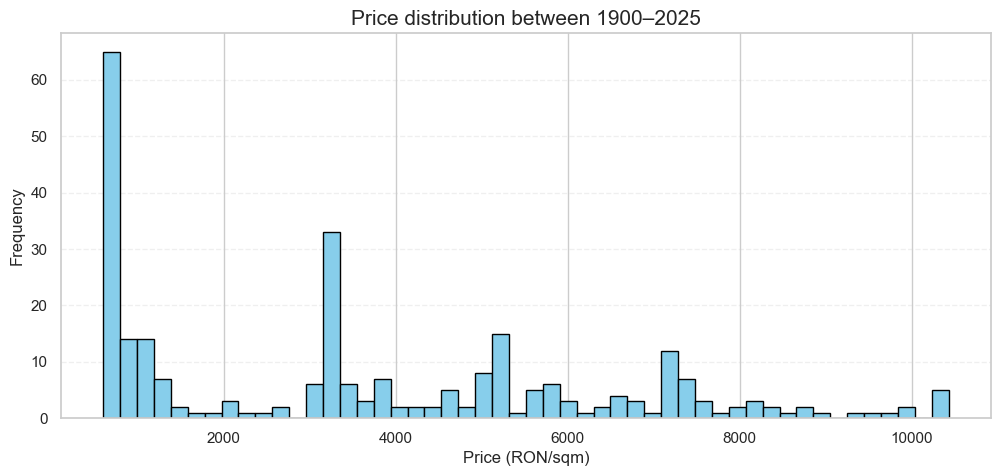

In [47]:
plt.figure(figsize=(12,5))
plt.hist(df["price_per_sqm"], bins=50, color="skyblue", edgecolor="black")
plt.title("Price distribution between 1900–2025", fontsize=15)
plt.xlabel("Price (RON/sqm)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


### 3. Boxplot over decades — outlier detection + era comparison


<Figure size 1600x600 with 0 Axes>

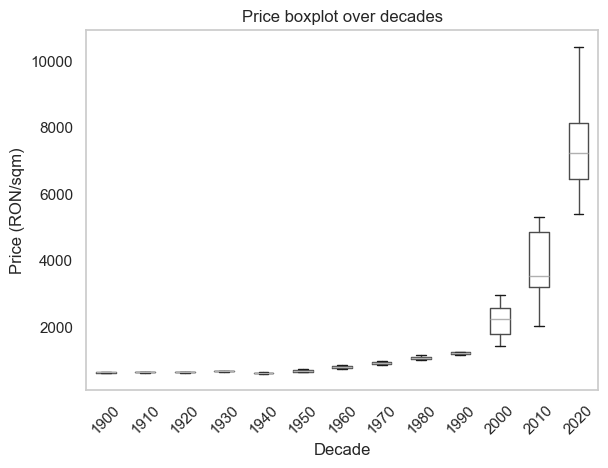

In [48]:
df["date"] = pd.to_datetime(df["date"])
df["decade"] = (df["date"].dt.year // 10) * 10

plt.figure(figsize=(16,6))
df.boxplot(column="price_per_sqm", by="decade", grid=False)
plt.title("Price boxplot over decades")
plt.suptitle("")
plt.xlabel("Decade")
plt.ylabel("Price (RON/sqm)")
plt.xticks(rotation=45)
plt.show()


### 4. Rate of Change (ROC) — % annual increase/decrease

This indicates:

-WW1 decline,

-WW2 decline,

-boom between 2000–2007,

-crisis in 2008.

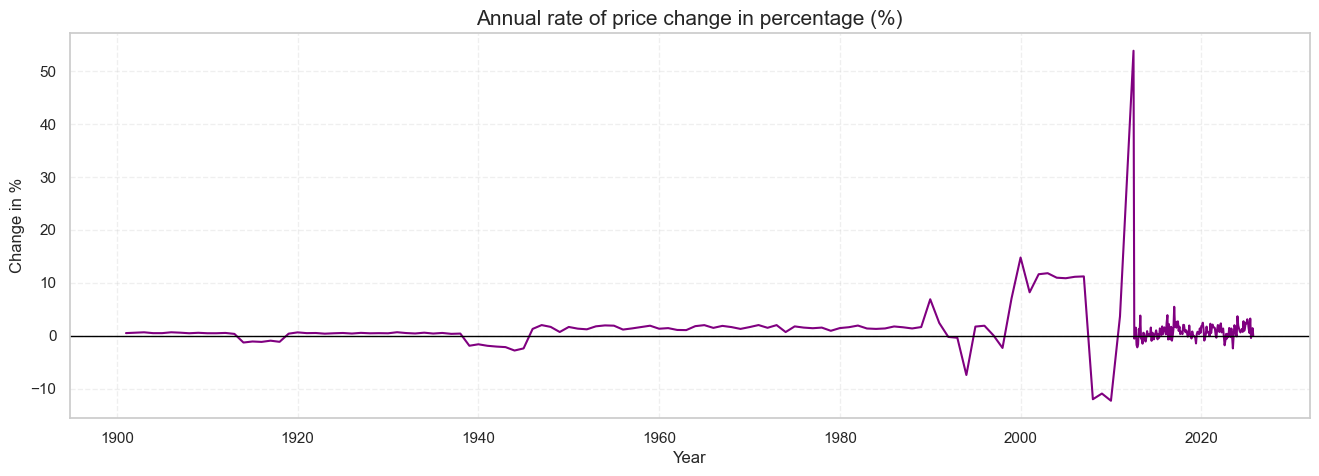

In [49]:
df["pct_change"] = df["price_per_sqm"].pct_change() * 100

plt.figure(figsize=(16,5))
plt.plot(df["date"], df["pct_change"], color="purple")
plt.axhline(0, color='black', linewidth=1)
plt.title("Annual rate of price change in percentage (%)", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Change in %")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


### 5. Applying Rolling Mean


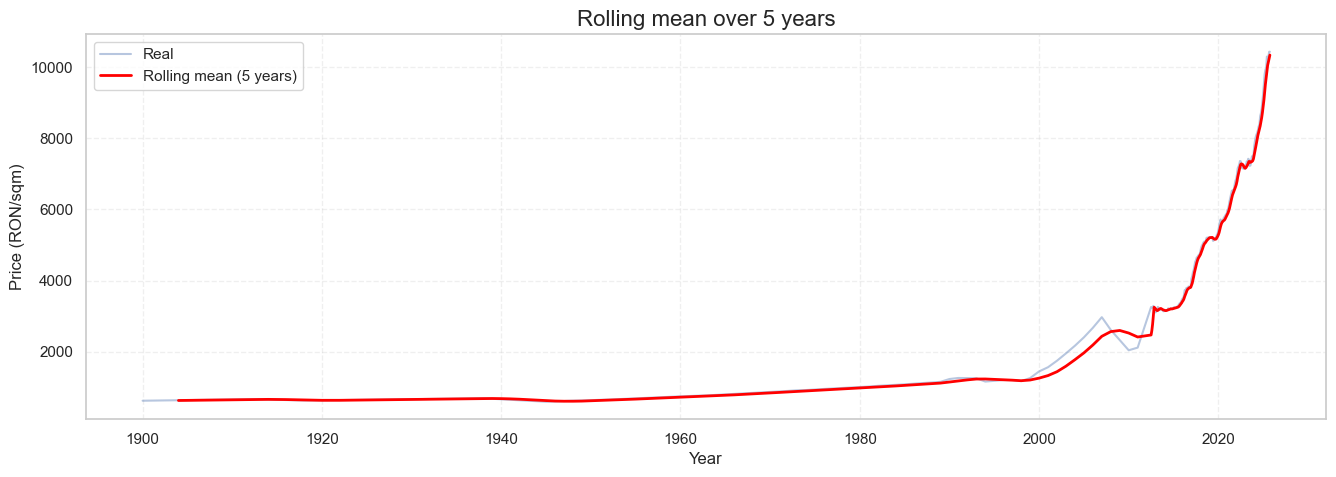

In [50]:
df["rolling_5"] = df["price_per_sqm"].rolling(window=5).mean()

plt.figure(figsize=(16,5))
plt.plot(df["date"], df["price_per_sqm"], alpha=0.4, label="Real")
plt.plot(df["date"], df["rolling_5"], color="red", linewidth=2, label="Rolling mean (5 years)")
plt.title("Rolling mean over 5 years", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Price (RON/sqm)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


### 6. Time Series Decomposition (trend, season, residuals)

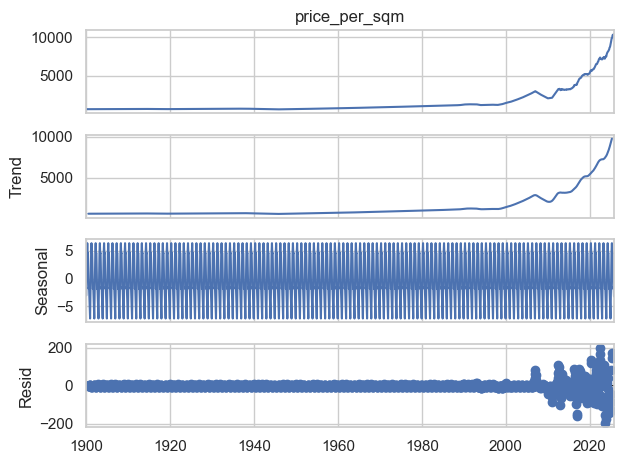

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_monthly = df.set_index("date").resample("MS").interpolate()

res = seasonal_decompose(df_monthly["price_per_sqm"], model="additive", period=12)
res.plot()
plt.show()


### 7. Scatter Plot — price vs. numerical year


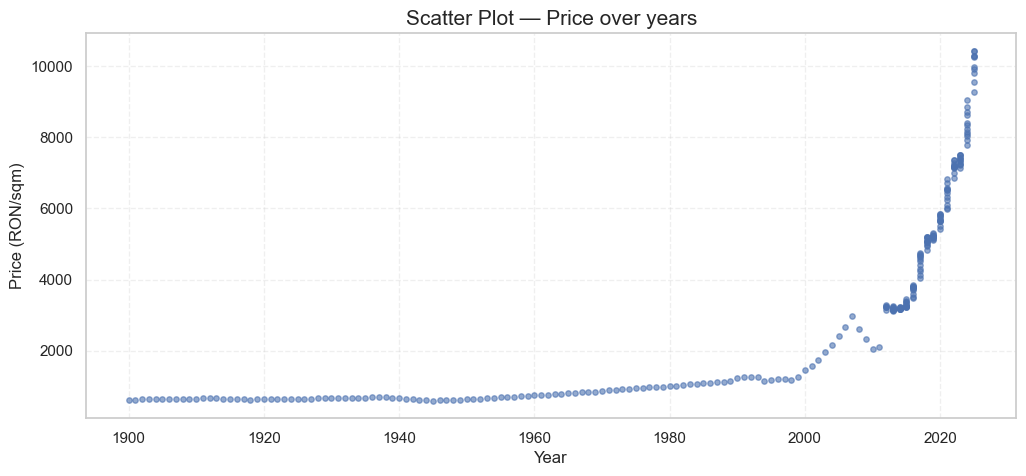

In [52]:
df["year"] = df["date"].dt.year

plt.figure(figsize=(12,5))
plt.scatter(df["year"], df["price_per_sqm"], s=15, alpha=0.6)
plt.title("Scatter Plot — Price over years", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Price (RON/sqm)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


### 8. Heatmap by decades and historical regions of the series


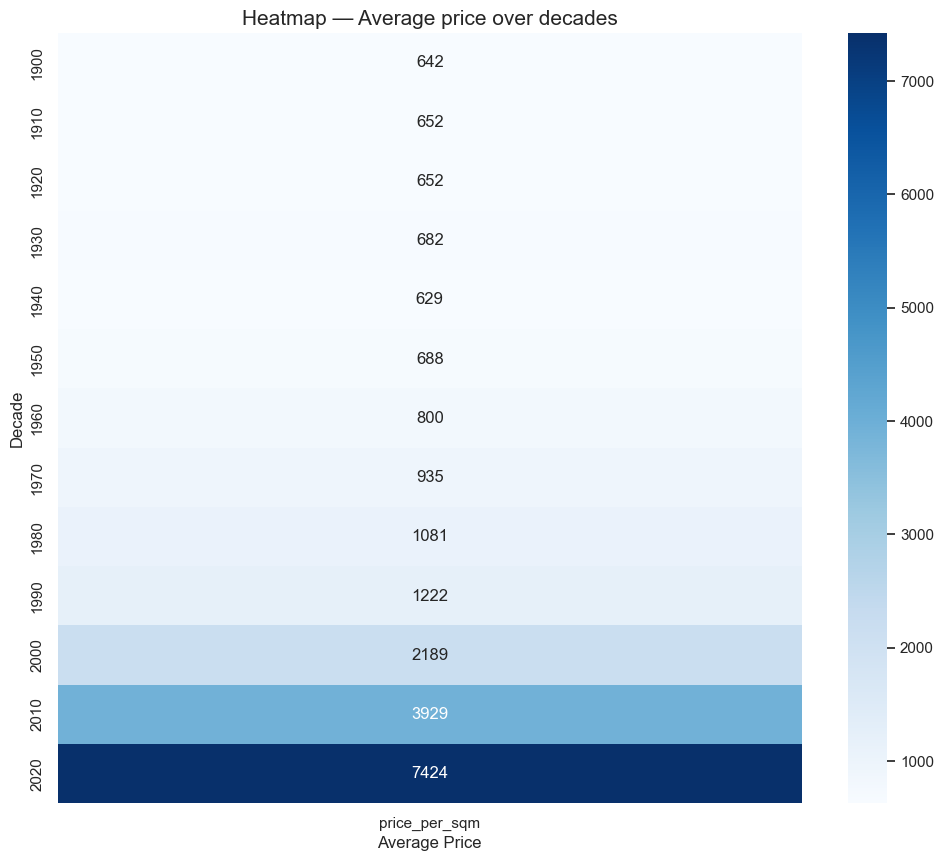

In [53]:
import seaborn as sns

pivot = df.pivot_table(values="price_per_sqm", index="decade", aggfunc="mean")

plt.figure(figsize=(12,10))
sns.heatmap(pivot, annot=True, cmap="Blues", fmt=".0f")
plt.title("Heatmap — Average price over decades", fontsize=15)
plt.xlabel("Average Price")
plt.ylabel("Decade")
plt.show()


### 9. Highlighting over historical periods

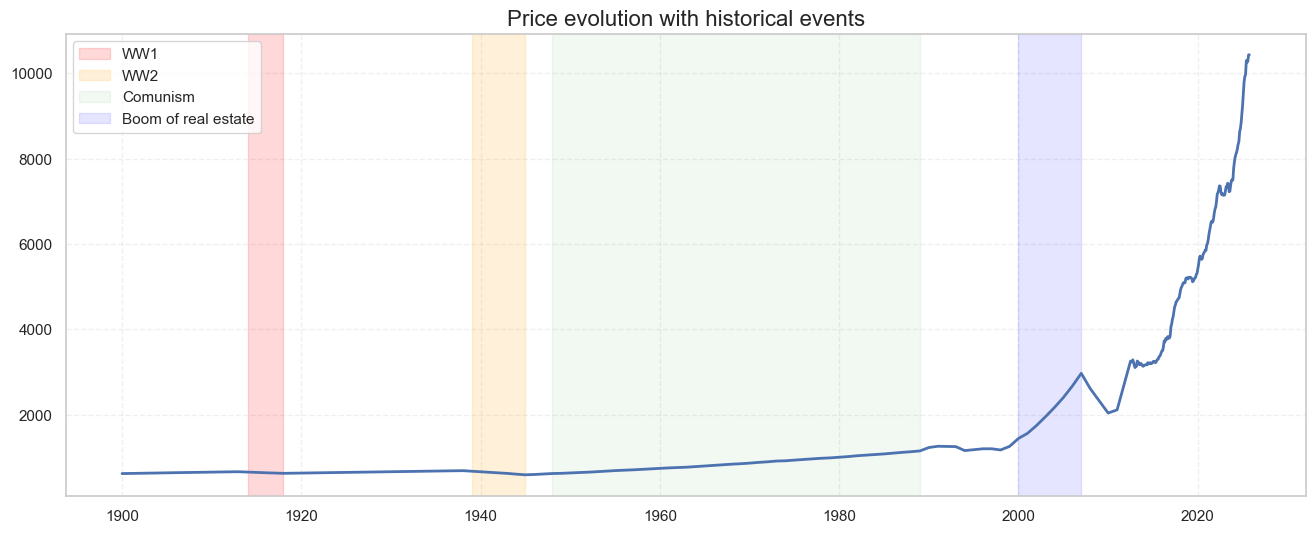

In [54]:
plt.figure(figsize=(16,6))
plt.plot(df["date"], df["price_per_sqm"], linewidth=2)

#WW1
plt.axvspan("1914", "1918", color="red", alpha=0.15, label="WW1")

#WW2
plt.axvspan("1939", "1945", color="orange", alpha=0.15, label="WW2")

#Comunism
plt.axvspan("1948", "1989", color="green", alpha=0.05, label="Comunism")

#Boom 2000–2007
plt.axvspan("2000", "2007", color="blue", alpha=0.1, label="Boom of real estate")

plt.legend()
plt.title("Price evolution with historical events", fontsize=16)
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


### 10. Autocorrelation Plot (ACF) — to see long-term dependencies

This graph shows us:

-if prices are time-dependent

-how “long” the memory of the series is

-if there is cyclicality

-if ARIMA/Prophet will work well

<Figure size 1200x500 with 0 Axes>

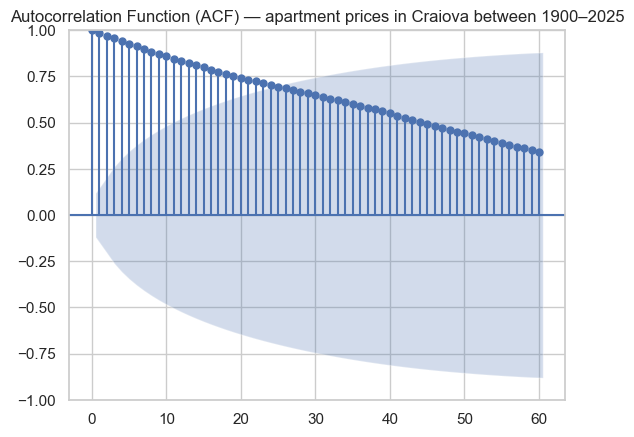

In [55]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plot_acf(df["price_per_sqm"], lags=60)
plt.title("Autocorrelation Function (ACF) — apartment prices in Craiova between 1900–2025")
plt.show()


### 11. Partial Autocorrelation Plot (PACF)


<Figure size 1200x500 with 0 Axes>

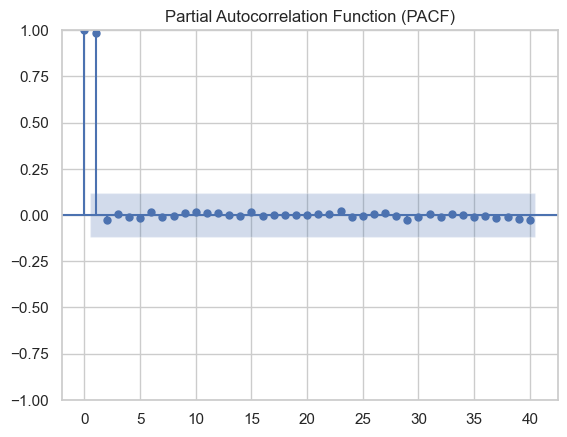

In [56]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12,5))
plot_pacf(df["price_per_sqm"], lags=40, method='ywm')
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

## Predictions over 10 years for Craiova

In [57]:
df = df.set_index("date")

# 3. Resampling to monthly frequency (MS = Month Start)
#  - 1900-2011: annual values will "stretch" over months by interpolation
#  - 2012-2025: the values remain practically unchanged (already monthly)

df_monthly = df.resample("MS").interpolate("linear")

In [58]:
df_monthly.head()

,price_per_sqm,decade,pct_change,rolling_5,year
date,,,,,
1900-01-01,626.160000,1900.0,NaN,NaN,1900.000000
1900-02-01,626.414167,1900.0,NaN,NaN,1900.083333
1900-03-01,626.668333,1900.0,NaN,NaN,1900.166667
1900-04-01,626.922500,1900.0,NaN,NaN,1900.250000
1900-05-01,627.176667,1900.0,NaN,NaN,1900.333333


In [59]:
df_monthly.tail()

,price_per_sqm,decade,pct_change,rolling_5,year
date,,,,,
2025-06-01,10293.04,2020.0,3.233908,9905.102,2025.0
2025-07-01,10247.70,2020.0,-0.440492,10045.164,2025.0
2025-08-01,10282.97,2020.0,0.344175,10142.906,2025.0
2025-09-01,10429.07,2020.0,1.420796,10244.676,2025.0
2025-10-01,10429.07,2020.0,0.000000,10336.370,2025.0


## Monthly series between 1900 - 2025

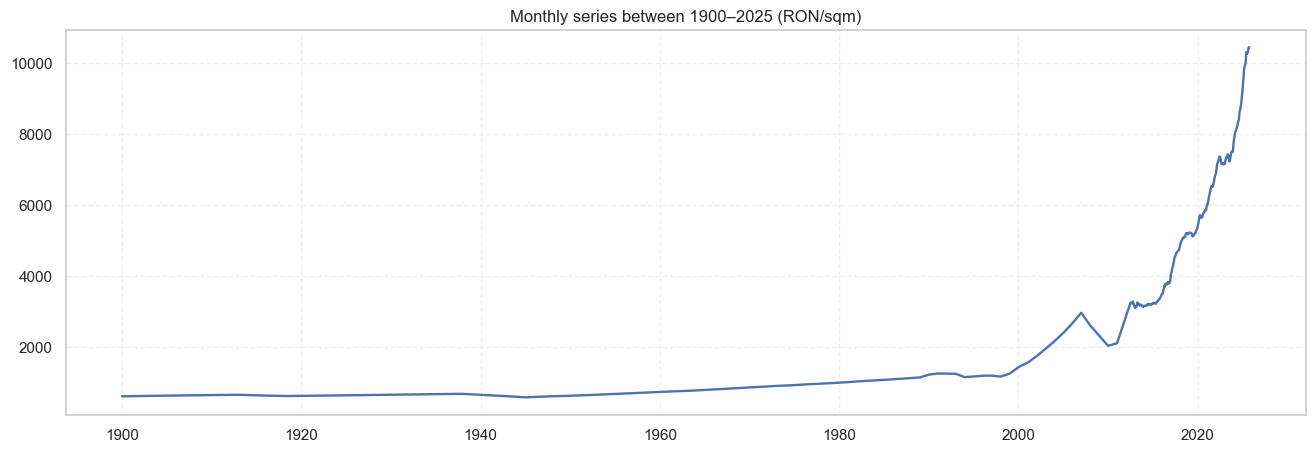

In [60]:
plt.figure(figsize=(16,5))
plt.plot(df_monthly.index, df_monthly["price_per_sqm"], linewidth=1.7)
plt.title("Monthly series between 1900–2025 (RON/sqm)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

## State Space Model training

In [61]:
from statsmodels.tsa.statespace.structural import UnobservedComponents
#The series we are modeling
y = df_monthly["price_per_sqm"]

#State Space Model: local trend + monthly seasonality
mod = UnobservedComponents(
    y,
    level="local linear trend",  #level + slope that updates over time
    seasonal=12                  #annual seasonality (12 months)
)

res = mod.fit()
print(res.summary())

                            Unobserved Components Results                            
Dep. Variable:                 price_per_sqm   No. Observations:                 1510
Model:                    local linear trend   Log Likelihood               -6767.688
                   + stochastic seasonal(12)   AIC                          13543.375
Date:                       Thu, 11 Dec 2025   BIC                          13564.620
Time:                               17:04:39   HQIC                         13551.290
Sample:                           01-01-1900                                         
                                - 10-01-2025                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  1.502e-07      3.462   4.34e-08      1

## Forecast over 10 years

In [62]:
#10 years = 120 months
steps = 10 * 12

forecast_res = res.get_forecast(steps=steps)
mean_forecast = forecast_res.predicted_mean
conf_int = forecast_res.conf_int()

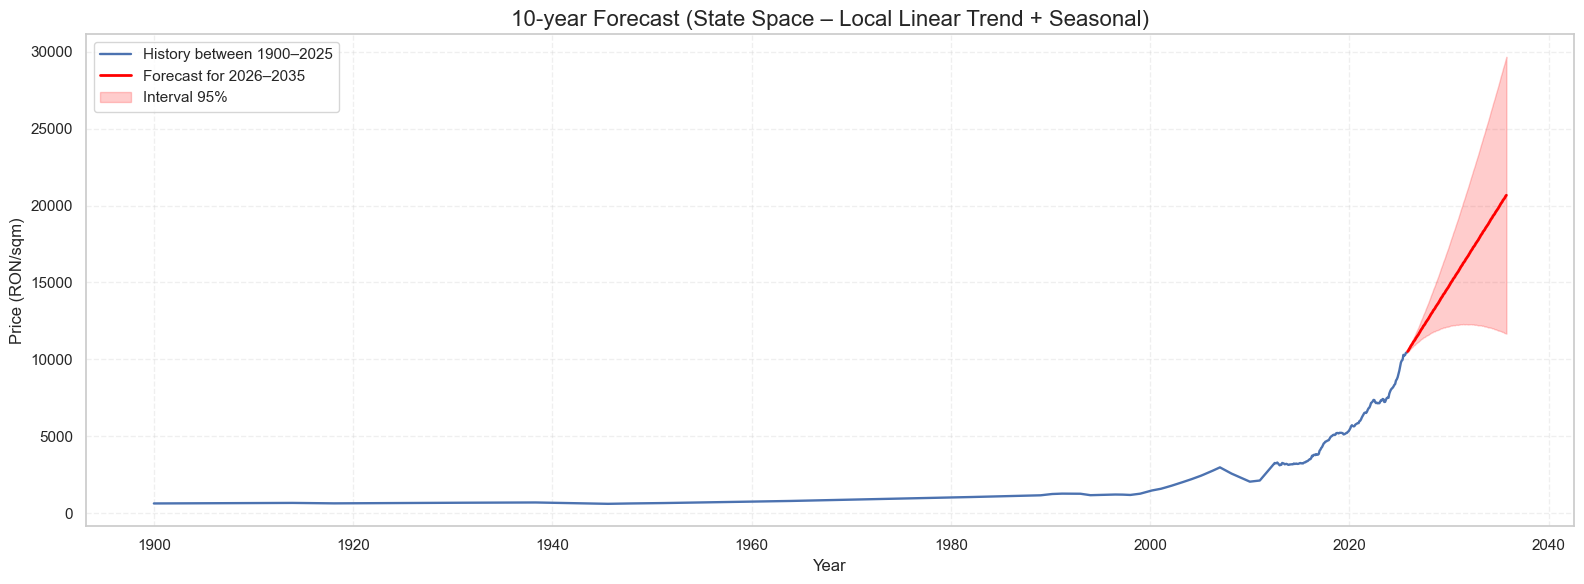

In [63]:
plt.figure(figsize=(16,6))

plt.plot(
    y.index, y,
    label="History between 1900–2025",
    linewidth=1.7,
)

#Forecast
plt.plot(
    mean_forecast.index, mean_forecast,
    label="Forecast for 2026–2035",
    color="red",
    linewidth=2,
)

#Confidence interval
plt.fill_between(
    conf_int.index,
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    color="red",
    alpha=0.2,
    label="Interval 95%",
)

plt.title("10-year Forecast (State Space – Local Linear Trend + Seasonal)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Price (RON/sqm)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [64]:
forecast_df = pd.DataFrame({
    "date": mean_forecast.index,
    "predicted_price": mean_forecast.values,
    "lower_ci": conf_int.iloc[:, 0].values,
    "upper_ci": conf_int.iloc[:, 1].values,
})

forecast_df.to_csv("results/state_space_forecast_2026_2035_monthly.csv", index=False)
print("Saved: state_space_forecast_2026_2035_monthly.csv")

Saved: state_space_forecast_2026_2035_monthly.csv


In [65]:
annual_forecast = (
    forecast_df
    .set_index("date")
    .resample("YE")
    .mean()
)

annual_forecast.index = annual_forecast.index.year

annual_forecast.to_csv("results/state_space_forecast_2026_2035_yearly.csv")
print("Saved: state_space_forecast_2026_2035_yearly.csv")

annual_forecast

Saved: state_space_forecast_2026_2035_yearly.csv


,predicted_price,lower_ci,upper_ci
date,,,
2025,10547.522001,10491.502724,10603.541278
2026,11157.411026,10888.562258,11426.259794
2027,12182.231949,11417.564865,12946.899033
2028,13207.052872,11798.100172,14616.005571
2029,14231.873794,12058.491292,16405.256296
2030,15256.694717,12215.329229,18298.060206
2031,16281.515640,12279.774481,20283.256799
2032,17306.336563,12259.999117,22352.674009
2033,18331.157486,12162.323164,24499.991808


## Forecast 1900 - 2035

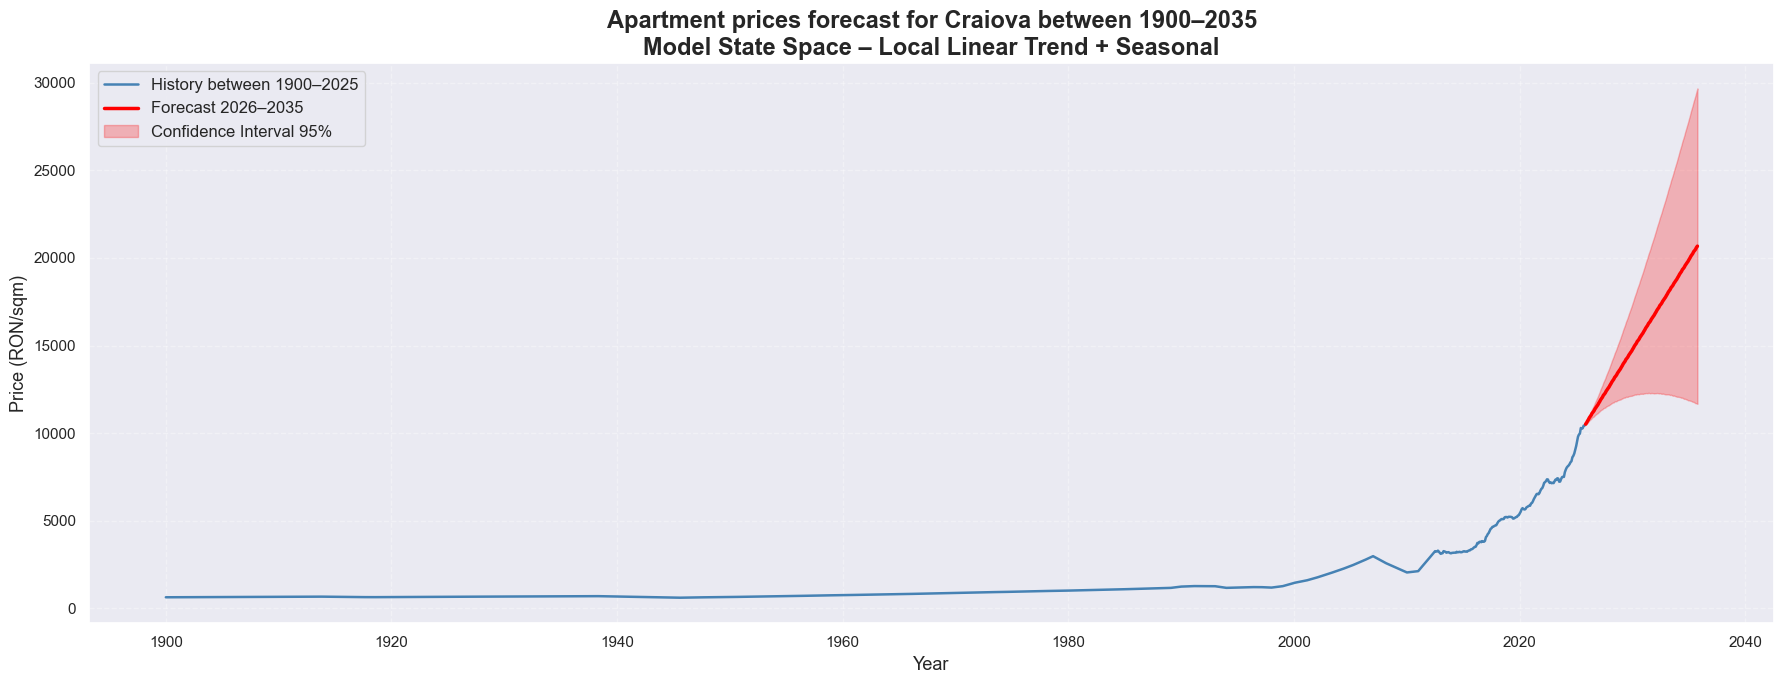

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,7))

plt.plot(
    y.index,
    y,
    label="History between 1900–2025",
    linewidth=1.8,
    color="steelblue"
)

#Forecast 2026–2035
plt.plot(
    mean_forecast.index,
    mean_forecast,
    label="Forecast 2026–2035",
    linewidth=2.5,
    color="red"
)

#Confidence Interval
plt.fill_between(
    conf_int.index,
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    color="red",
    alpha=0.25,
    label="Confidence Interval 95%"
)

plt.title("Apartment prices forecast for Craiova between 1900–2035\nModel State Space – Local Linear Trend + Seasonal",
          fontsize=17, fontweight="bold")
plt.xlabel("Year", fontsize=13)
plt.ylabel("Price (RON/sqm)", fontsize=13)
plt.grid(True, linestyle="--", alpha=0.35)
plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig("results/forecast_1900_2035_statespace.png", dpi=220)
plt.show()

## Forecast 2026 - 2035

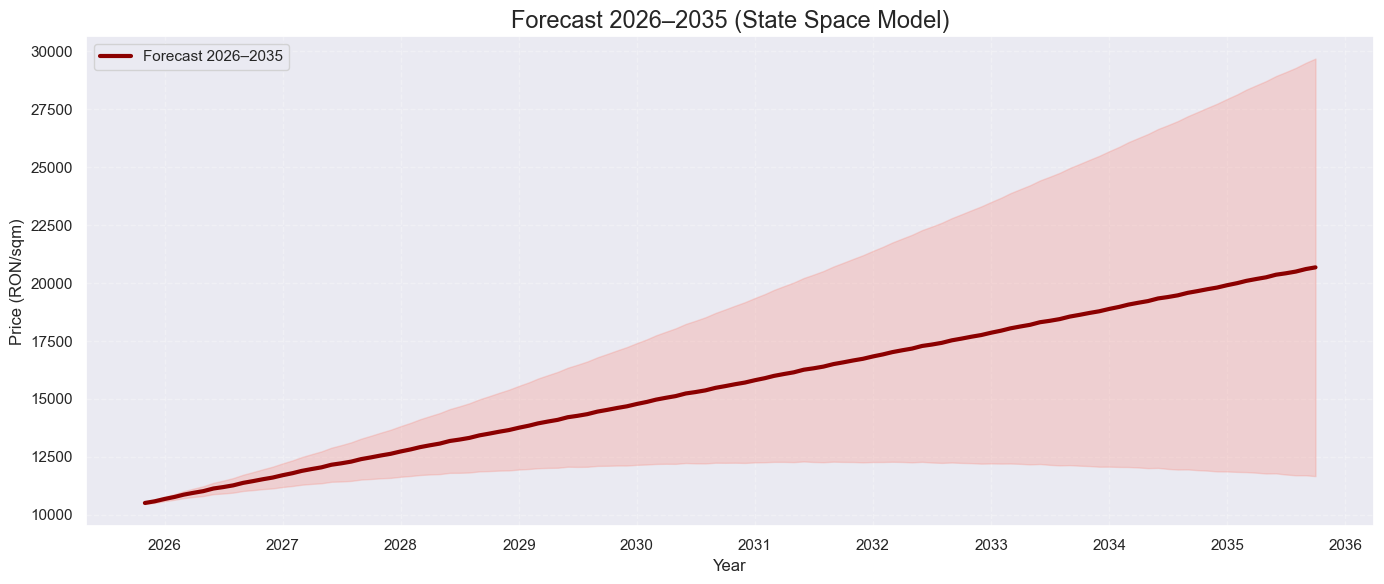

In [67]:
plt.figure(figsize=(14,6))

plt.plot(
    mean_forecast.index,
    mean_forecast,
    color="darkred",
    linewidth=3,
    label="Forecast 2026–2035"
)

plt.fill_between(
    conf_int.index,
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    color="salmon",
    alpha=0.25
)

plt.title("Forecast 2026–2035 (State Space Model)", fontsize=17)
plt.xlabel("Year")
plt.ylabel("Price (RON/sqm)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend()
plt.tight_layout()

plt.savefig("results/forecast_2026_2035_statespace.png", dpi=220)
plt.show()

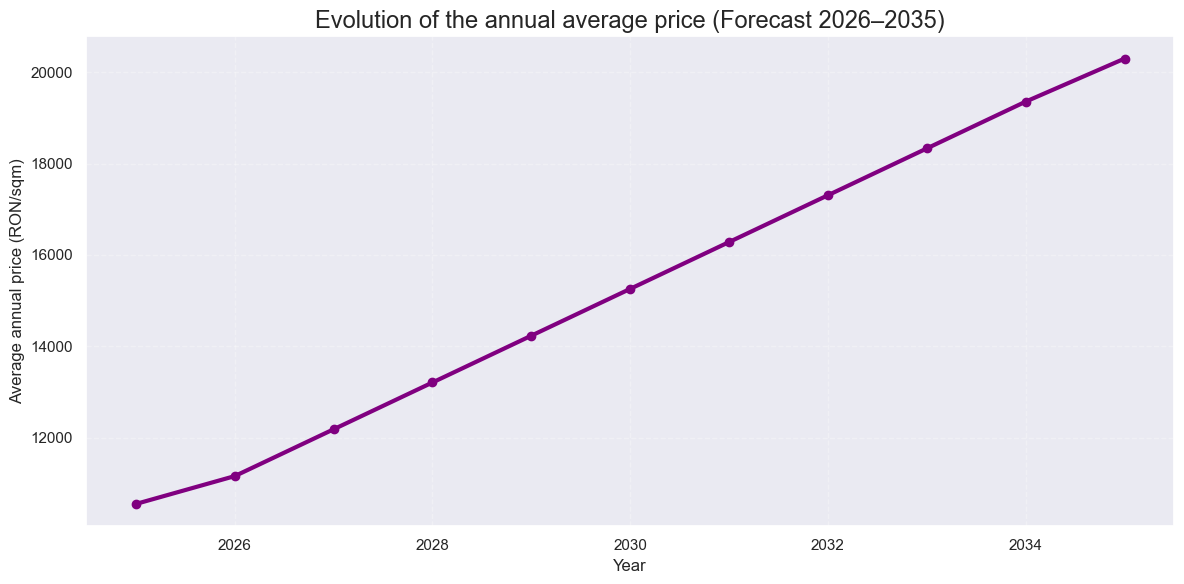

In [68]:
plt.figure(figsize=(12,6))
plt.plot(
    annual_forecast.index,
    annual_forecast["predicted_price"],
    marker="o",
    linewidth=3,
    color="purple"
)

plt.title("Evolution of the annual average price (Forecast 2026–2035)", fontsize=17)
plt.xlabel("Year")
plt.ylabel("Average annual price (RON/sqm)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()

plt.savefig("results/annual_forecast_2026_2035.png", dpi=220)
plt.show()

# Complete CSV data (added prediction between 2026 - 2035)

In [69]:
import pandas as pd

df_hist = pd.read_csv("merged_data/craiova_apartment_prices_1900_2025.csv",
                      parse_dates=["date"])

df_forecast = pd.read_csv("results/state_space_forecast_2026_2035_yearly.csv",
                          parse_dates=["date"])

df_forecast = df_forecast.rename(columns={
    "predicted_price": "price_per_sqm",
    "forecast": "price_per_sqm"
})

df_forecast = df_forecast[["date", "price_per_sqm"]]

df_full = pd.concat([df_hist, df_forecast], ignore_index=True)

df_full = df_full.sort_values("date").reset_index(drop=True)

output_path = "results/craiova_apartment_prices_1900_2035.csv"
df_full.to_csv(output_path, index=False)

print("Final dataset saved successfully!")
print(output_path)

Final dataset saved successfully!
results/craiova_apartment_prices_1900_2035.csv


#### Acum ca am observat predictiile facute, ne dorim totusi sa imbunatatim putin predictiile sau sa vedem daca se poate schimba ceva

# FEATURE IMPORTANCE ON NEW DATA

### Pe ce date sa facem feature importance? Ei bine, pe niste date venite din factori externi care impacteaza intr-o mica sau mare masura predictiile facute. Ramane de vazut daca predictiile facute se vor imbunatati...

## Practic noul set de date va include new features : PIB-ul Romaniei, rata inflatiei, Factorul de crestere al populatiei urbane, costul materialelor de constructie

In [70]:
import pandas as pd

df_all = pd.read_csv("merged_data/full.csv")

df_all.head()

,An,index_cost_mat,urban_incr_proc,rata_infl,pib_dolj_mld_ron,price_per_sqm
0,1900,25.000,0.0040,3.00,0.408,622.14
1,1901,25.175,0.0040,3.06,0.423,625.18
2,1902,25.352,0.0040,3.13,0.439,628.63
3,1903,25.530,0.0041,3.19,0.456,632.53
4,1904,25.709,0.0041,3.26,0.472,635.58


In mod normal ar fi trebuit sa antrenez modelul, sa trag concluzii, etc...Dar, am constatat ca va exista o a 8-a generare a datelor din 1900-2011. De ce?
Pentru ca pretul pe metrul patrat de 250 ron era doar o aproximare ochiometrica, nicidecum o aproximare bazata pe niste medii de preturi, neluand in calcul salariile care trebuiau raportate la puterea de cumparare a lui 2025. Si atunci, generarea a 8-a vine cu aceasta problema rezolvata. Si deducem aproximarea dupa formula :

current_price = (salariu_mediu_lunar_1900 * 12 * cati_ani_de_plata)/suprafata_medie_apartament

Aplicand aceasta formula pe constantele:

salariu_mediu_lunar_1900 = 180 lei la 1900 = 453,2 lei raportat la 2025
cati_ani_de_plata = 2 ani aproximativ la vremea respectiva
suprafata_medie_apartament = 50 m patrati

Considerand toate acestea, pretul pe metrul patrat a devenit aproximativ 217,6.

Chiar daca diferenta ulterioara vazuta in tabele nu ar fi prea mare, orice "exactitate" adusa in tematica problemei este benefica pentru perfectionarea ei.

In [71]:
import pandas as pd

df_all_gen8 = pd.read_csv("merged_data/full_gen8.csv")

df_all_gen8.head()

,An,index_cost_mat,urban_incr_proc,rata_infl,pib_dolj_mld_ron,price_per_sqm
0,1900,25.000,0.0040,3.00,0.408,626.16
1,1901,25.175,0.0040,3.06,0.423,629.21
2,1902,25.352,0.0040,3.13,0.439,632.73
3,1903,25.530,0.0041,3.19,0.456,636.76
4,1904,25.709,0.0041,3.26,0.472,639.81


                        Unobserved Components Results                         
Dep. Variable:          price_per_sqm   No. Observations:                  126
Model:             local linear trend   Log Likelihood                -816.482
Date:                Thu, 11 Dec 2025   AIC                           1646.964
Time:                        17:04:41   BIC                           1666.706
Sample:                    01-01-1900   HQIC                          1654.984
                         - 01-01-2025                                         
Covariance Type:                  opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
sigma2.irregular        732.5758   3164.244      0.232      0.817   -5469.228    6934.380
sigma2.level            378.9737   1.16e+04      0.033      0.974   -2.24e+04    2.32e+04
sigma2.t

H:\CURS_SDA_DS\Proiecte\Apartment_Prices_Prediction\.venv\lib\site-packages\statsmodels\tsa\statespace\structural.py:426: SpecificationWarning: Value of `stochastic_level` may be overridden when the trend component is specified using a model string.
  warn("Value of `%s` may be overridden when the trend"
H:\CURS_SDA_DS\Proiecte\Apartment_Prices_Prediction\.venv\lib\site-packages\statsmodels\tsa\statespace\structural.py:426: SpecificationWarning: Value of `stochastic_trend` may be overridden when the trend component is specified using a model string.
  warn("Value of `%s` may be overridden when the trend"
H:\CURS_SDA_DS\Proiecte\Apartment_Prices_Prediction\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)



Saved state_space_regression_output.csv


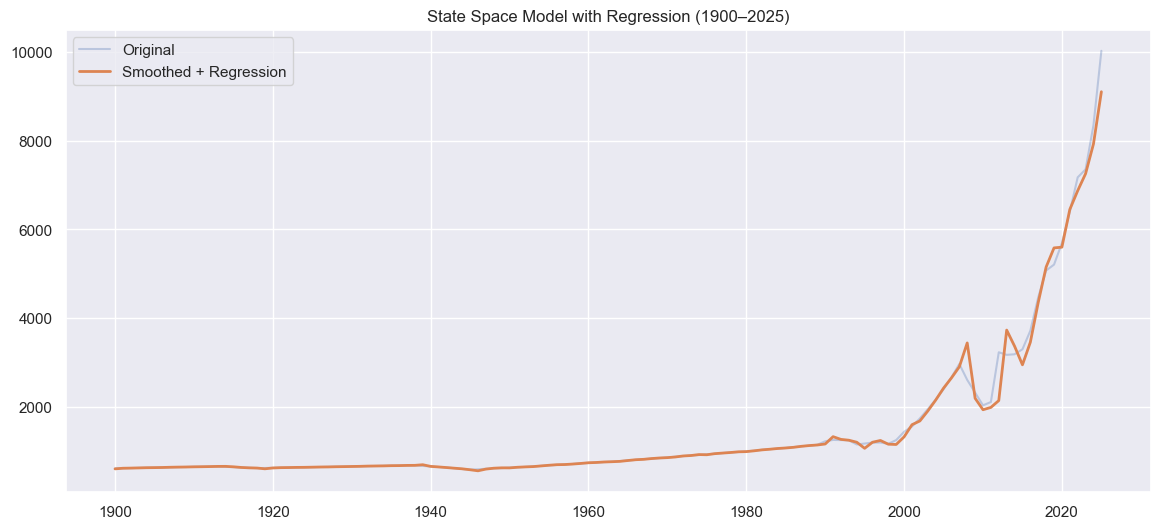

In [72]:
#antrenam modelul de Time Series - State Space Model:

import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.structural import UnobservedComponents
import matplotlib.pyplot as plt

df = df_all_gen8.copy()

# set index as datetime (required)
df["date"] = pd.to_datetime(df["An"].astype(str) + "-01-01")
df = df.set_index("date")

# target variable (price per sqm)
y = df["price_per_sqm"]

# regressors you want to include
X = df[["pib_dolj_mld_ron", "index_cost_mat", "urban_incr_proc", "rata_infl"]].copy()

model = UnobservedComponents(
    endog=y,
    level="local linear trend",
    exog=X,
    stochastic_level=True,
    stochastic_trend=True
)

res = model.fit(method="powell", disp=False)
print(res.summary())

df["price_smoothed"] = res.fittedvalues
df["trend_component"] = res.level.smoothed
df["trend_slope"] = res.trend.smoothed

df.to_csv("results/state_space_regression_output.csv")
print("Saved state_space_regression_output.csv")

plt.figure(figsize=(14,6))
plt.plot(df.index, y, label="Original", alpha=0.3)
plt.plot(df.index, df["price_smoothed"], label="Smoothed + Regression", linewidth=2)
plt.title("State Space Model with Regression (1900–2025)")
plt.legend()
plt.grid(True)
plt.show()

# Forecast 2026 - 2050 (daca tot avem pe ce date sa ne bazam, extind intervalul)

In [73]:
import pandas as pd
from pandas.tseries.offsets import DateOffset

last_date = df.index.max()

steps = 2050 - last_date.year

future_index = pd.date_range(
    start=last_date + DateOffset(years=1),
    periods=steps,
    freq="YS"
)

X_last = X.iloc[-1]

X_future = pd.DataFrame(
    [X_last.values] * steps,
    index=future_index,
    columns=X.columns
)

forecast_res = res.get_forecast(steps=steps, exog=X_future)
f_mean = forecast_res.predicted_mean
f_ci = forecast_res.conf_int()

df_forecast = pd.DataFrame({
    "predicted_price_sqm": f_mean,
    "ci_lower": f_ci.iloc[:, 0],
    "ci_upper": f_ci.iloc[:, 1],
})

df_forecast.to_csv("forecast_2026_2050_state_space.csv")
print("Saved: forecast_2026_2050_state_space.csv")

Saved: forecast_2026_2050_state_space.csv


In [74]:
df_forecast.head()

,predicted_price_sqm,ci_lower,ci_upper
2026-01-01,12076.482092,11733.110275,12419.853908
2027-01-01,14157.482367,13421.843788,14893.120945
2028-01-01,16238.482641,15024.272828,17452.692455
2029-01-01,18319.482916,16554.180438,20084.785395
2030-01-01,20400.483191,18020.128005,22780.838378


In [75]:
df_forecast.drop(columns=["ci_lower","ci_upper"], inplace=True)

In [76]:
df_forecast.head()

,predicted_price_sqm
2026-01-01,12076.482092
2027-01-01,14157.482367
2028-01-01,16238.482641
2029-01-01,18319.482916
2030-01-01,20400.483191


In [77]:
df_forecast = df_forecast.copy()
df_forecast["An"] = df_forecast.index.year
df_forecast = df_forecast.reset_index(drop=True)

In [78]:
df_forecast['predicted_price_sqm'] = df_forecast['predicted_price_sqm'].round(2)
df_forecast.head()

,predicted_price_sqm,An
0,12076.48,2026
1,14157.48,2027
2,16238.48,2028
3,18319.48,2029
4,20400.48,2030


In [79]:
df_forecast.to_csv("results/forecast_2026_2050.csv" , index=False)

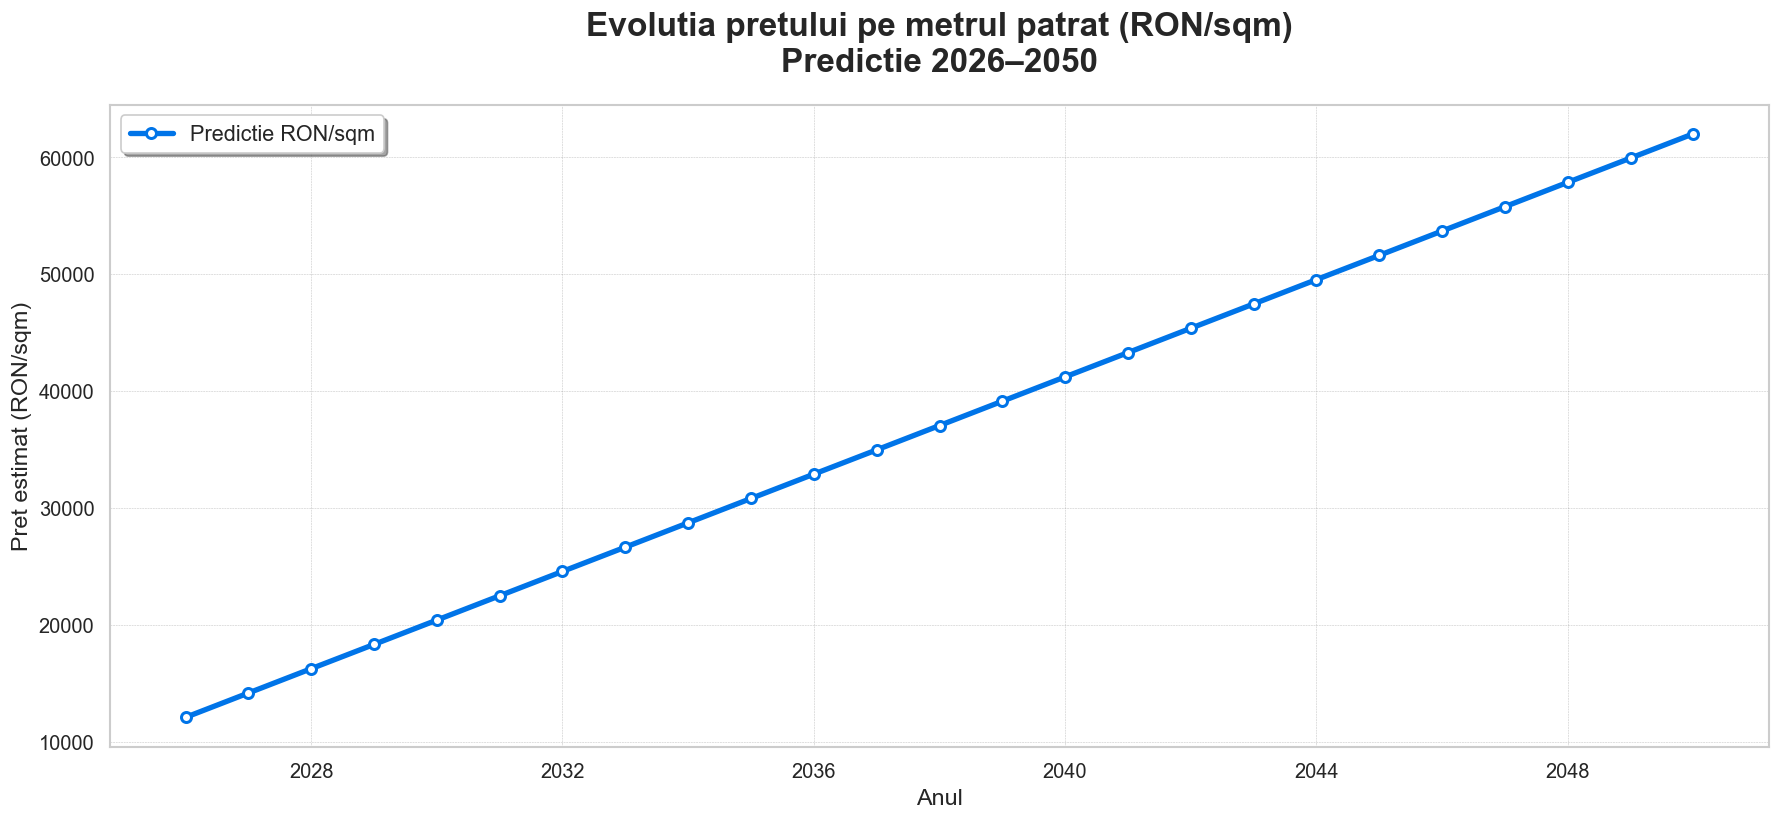

SAved : forecast_2026_2050_plot.png


In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("results/forecast_2026_2050.csv")

if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"])
elif "An" in df.columns:
    df["Date"] = pd.to_datetime(df["An"].astype(str) + "-01-01")
else:
    raise ValueError("CSV must contain either 'Date' or 'An' column.")

sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 7), dpi=120)

plt.plot(
    df["Date"],
    df["predicted_price_sqm"],
    color="#0074E8",
    linewidth=3.2,
    marker="o",
    markersize=6,
    markerfacecolor="white",
    markeredgewidth=1.8,
    label="Predictie RON/sqm"
)

plt.title(
    "Evolutia pretului pe metrul patrat (RON/sqm)\nPredictie 2026–2050",
    fontsize=20,
    fontweight="bold",
    pad=20
)

plt.xlabel("Anul", fontsize=14)
plt.ylabel("Pret estimat (RON/sqm)", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(color="gray", linestyle="--", linewidth=0.3, alpha=0.5)
plt.legend(fontsize=13, frameon=True, shadow=True)

plt.tight_layout()
plt.savefig("results/forecast_2026_2050_plot.png", dpi=150)
plt.show()

print("Saved : forecast_2026_2050_plot.png")


Concluzie_1 : Trendul este strict crescator, observandu-se pretul aproape triplat in anul 2035 fata de 2025 si in 2050 aproape de 5 ori mai mare fata de 2025.
Cu toate acestea, in cazul unor crize economice puternice si a unui posibil razboi, predictiile facute nu vor mai fi valide. De aceea, importante raman predictiile pe termen scurt, care sunt capabile sa vada posibilele riscuri. Predictiile facute sunt in scop strict orientativ, pentru a incerca o prevenire a scumpirilor.

Dar totusi este State Space cel mai bun model la momentul actual al problemei? Aducand in discutie strict componenta temporala si cu pretul pe metrul patrat, DA, categoric. Dar avand in vedere ca am mai adus date in proiect, date care dau un meaning in plus, care au o deosebita importanta in calculul predictiilor State Space model devine insuficient. El nu invata pattern-uri propriu-zise, ci incearca sa vada doar o mica legatura numerica intre date si features. Deci, testand si alte modele ne putem da seama si de acuratete si sa dam intr-adevar un sens calculelor noastre.

Testand mai multe modele, avem urmatoarele scoruri:

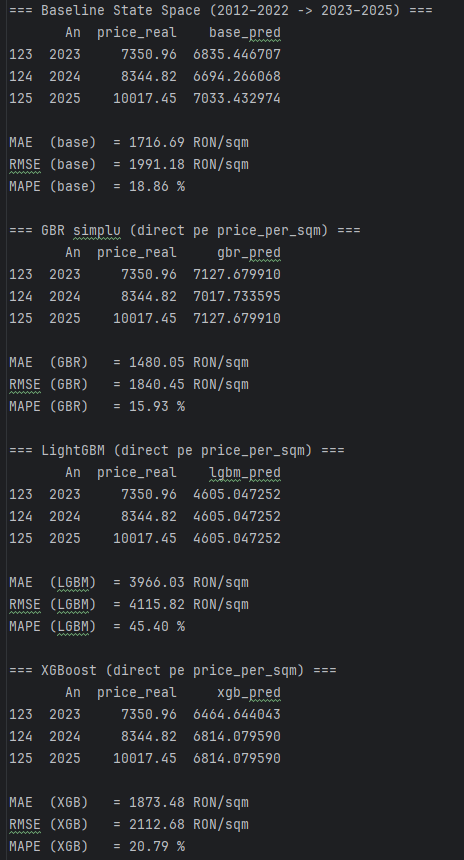

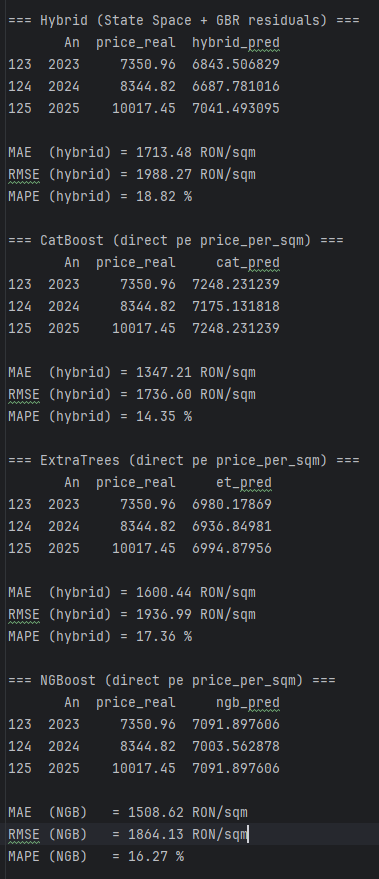

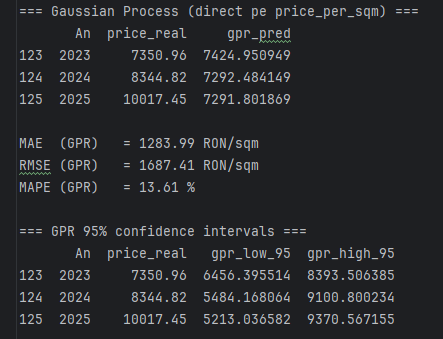

# Dupa cum se poate observa cele mai bune modele dupa scor sunt Gaussian Process si CatBoost

Gaussian Process Regression a obținut cea mai bună performanță numerică în etapa de backtesting, datorită capacității sale de a modela relații non-liniare și de a oferi estimări robuste pe seturi de date mici.

Cu toate acestea, GPR prezintă limitări în extrapolarea pe orizonturi lungi de timp, iar incertitudinea estimărilor crește rapid în afara intervalului de antrenare.

CatBoost Regressor oferă un compromis foarte bun între precizie și stabilitate, demonstrând performanțe consistente și un comportament mai robust pentru predicții pe termen mediu și lung.

# CatBoost Forecasting 2026-2050

In [123]:
import pandas as pd

df_all_gen8 = pd.read_csv("merged_data/full_gen8.csv")

df_all_gen8.head()

,An,index_cost_mat,urban_incr_proc,rata_infl,pib_dolj_mld_ron,price_per_sqm
0,1900,25.000,0.0040,3.00,0.408,626.16
1,1901,25.175,0.0040,3.06,0.423,629.21
2,1902,25.352,0.0040,3.13,0.439,632.73
3,1903,25.530,0.0041,3.19,0.456,636.76
4,1904,25.709,0.0041,3.26,0.472,639.81


In [124]:
target_col = "price_per_sqm"
exog_cols = ["index_cost_mat", "urban_incr_proc", "rata_infl", "pib_dolj_mld_ron"]

In [125]:
df_all_gen8["price_lag1"] = df_all_gen8[target_col].shift(1)
df_all_gen8["price_lag2"] = df_all_gen8[target_col].shift(2)

In [126]:
df_all_gen8.head()

,An,index_cost_mat,urban_incr_proc,rata_infl,pib_dolj_mld_ron,price_per_sqm,price_lag1,price_lag2
0,1900,25.000,0.0040,3.00,0.408,626.16,NaN,NaN
1,1901,25.175,0.0040,3.06,0.423,629.21,626.16,NaN
2,1902,25.352,0.0040,3.13,0.439,632.73,629.21,626.16
3,1903,25.530,0.0041,3.19,0.456,636.76,632.73,629.21
4,1904,25.709,0.0041,3.26,0.472,639.81,636.76,632.73


In [127]:
df_all_gen8["year_scaled"] = (df_all_gen8["An"] - 1900) / 100.0

In [128]:
feature_cols = exog_cols + ["price_lag1", "price_lag2", "year_scaled"]

In [129]:
train_df = df_all_gen8.dropna(subset=feature_cols + [target_col]).copy()

In [130]:
X = train_df[feature_cols]
y = train_df[target_col]

In [131]:
# Train pe 1900–2025, dar tinem ultimii ani pentru sanity check
train_mask = train_df["An"] <= 2022
test_mask  = train_df["An"] >= 2023

In [132]:
X_train = train_df.loc[train_mask, feature_cols]
y_train = train_df.loc[train_mask, target_col]

In [133]:
X_test  = train_df.loc[test_mask, feature_cols]
y_test  = train_df.loc[test_mask, target_col]
years_test = train_df.loc[test_mask, "An"].values

In [134]:
from catboost import CatBoostRegressor

In [135]:
cat = CatBoostRegressor(
    depth=6,
    iterations=900,
    learning_rate=0.05,
    loss_function="MAE",
    verbose=0,
    random_state=42
)

In [136]:
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_test)

In [137]:
import numpy as np

df_cmp = pd.DataFrame({
    "An": years_test,
    "price_real": y_test.values,
    "price_pred": cat_pred
})

df_cmp["abs_error"] = np.abs(df_cmp["price_pred"] - df_cmp["price_real"])
df_cmp["pct_error"] = df_cmp["abs_error"] / df_cmp["price_real"] * 100

print(df_cmp)
print("MAE:", df_cmp["abs_error"].mean())
print("MAPE:", df_cmp["pct_error"].mean())

     An  price_real   price_pred    abs_error  pct_error
0  2023     7350.96  7305.967712    44.992288   0.612060
1  2024     8344.82  6723.115619  1621.704381  19.433665
2  2025    10017.45  7318.569214  2698.880786  26.941794
MAE: 1455.1924849402224
MAPE: 15.662506554493504


In [138]:
cat.fit(X, y)

In [139]:
#construim exog pentru viitor (baseline simplu din ultimii 10 ani)
def build_future_exog(df_hist, start_year=2026, end_year=2050):
    df_hist = df_hist.sort_values("An").copy()
    tail = df_hist[df_hist["An"] >= df_hist["An"].max() - 9].copy()

    def cagr(series):
        s = series.dropna().values
        if len(s) < 2 or s[0] <= 0:
            return 0.0
        return (s[-1] / s[0]) ** (1 / (len(s) - 1)) - 1

    g_mat = 0.04      #4%/an materiale
    g_pib = 0.035     #3.5%/an PIB
    infl_mean = 0.03  #3% inflatie
    urban_step = 0.00002
    if np.isnan(urban_step):
        urban_step = 0.0

    last = df_hist.iloc[-1]
    mat = float(last["index_cost_mat"])
    pib = float(last["pib_dolj_mld_ron"])
    urban = float(last["urban_incr_proc"])

    rows = []
    for y in range(start_year, end_year + 1):
        mat *= (1 + g_mat)
        pib *= (1 + g_pib)
        urban = max(0.0, urban + urban_step)

        rows.append({
            "An": y,
            "index_cost_mat": mat,
            "urban_incr_proc": urban,
            "rata_infl": infl_mean,
            "pib_dolj_mld_ron": pib
        })

    return pd.DataFrame(rows)

future_exog = build_future_exog(df_all_gen8, 2026, 2050)

# seed lag-uri cu ultimii 2 ani reali (din df_all_gen8, nu train_df)
last_1 = float(df_all_gen8.loc[df_all_gen8["An"] == 2025, target_col].iloc[0])
last_2 = float(df_all_gen8.loc[df_all_gen8["An"] == 2024, target_col].iloc[0])

preds = []

for _, row in future_exog.iterrows():
    X_one = pd.DataFrame([{
    "index_cost_mat": row["index_cost_mat"],
    "urban_incr_proc": row["urban_incr_proc"],
    "rata_infl": row["rata_infl"],
    "pib_dolj_mld_ron": row["pib_dolj_mld_ron"],
    "price_lag1": last_1,
    "price_lag2": last_2,
    "year_scaled": (row["An"] - 1900) / 100.0
}], columns=feature_cols)

    y_hat = float(cat.predict(X_one)[0])
    preds.append({"An": int(row["An"]), "price_pred": y_hat})

    last_2 = last_1
    last_1 = y_hat

df_forecast = pd.DataFrame(preds)
df_forecast.to_csv("results/catboost_forecast_2026_2050.csv", index=False)
print(df_forecast.head())

     An   price_pred
0  2026  5553.230596
1  2027  5547.248379
2  2028  5245.064716
3  2029  5245.053182
4  2030  5245.053182


Desi scorul la antrenare este ok, rezultatele la CatBoost nu par prea convingatoare...Totusi el e capabil sa vada corelatiile economice dar pare ca nu intelege propriu-zis seria de timp si atunci voi testa si primul model ca benchmark si anume Gaussian Process.

# Gaussian Process Forecast 2026 - 2050

In [140]:
import pandas as pd

df_all_gen8 = pd.read_csv("merged_data/full_gen8.csv")

df_all_gen8.head()

,An,index_cost_mat,urban_incr_proc,rata_infl,pib_dolj_mld_ron,price_per_sqm
0,1900,25.000,0.0040,3.00,0.408,626.16
1,1901,25.175,0.0040,3.06,0.423,629.21
2,1902,25.352,0.0040,3.13,0.439,632.73
3,1903,25.530,0.0041,3.19,0.456,636.76
4,1904,25.709,0.0041,3.26,0.472,639.81


In [141]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C

df_all_gen8 = pd.read_csv("merged_data/full_gen8.csv")

exog_cols = ["index_cost_mat", "urban_incr_proc", "rata_infl", "pib_dolj_mld_ron"]

#features
df_all_gen8["year_scaled"] = (df_all_gen8["An"] - 1900) / 100.0
df_all_gen8["price_lag1"] = df_all_gen8[target_col].shift(1)
df_all_gen8["price_lag2"] = df_all_gen8[target_col].shift(2)

feature_cols = exog_cols + ["price_lag1", "price_lag2", "year_scaled"]

train_df = df_all_gen8.dropna(subset=feature_cols + [target_col]).copy()
X = train_df[feature_cols]
y = train_df[target_col].astype(float)

kernel = (
    C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))
    + WhiteKernel(noise_level=1.0, noise_level_bounds=(1e-5, 1e3))
)

gpr = Pipeline([
    ("scaler", StandardScaler()),
    ("gpr", GaussianProcessRegressor(
        kernel=kernel,
        normalize_y=True,
        n_restarts_optimizer=10,
        random_state=42
    ))
])

gpr.fit(X, y)

#in-sample predictions + uncertainty
y_pred, y_std = gpr.predict(X, return_std=True)

train_df["gpr_pred_in_sample"] = y_pred
train_df["gpr_std_in_sample"] = y_std
train_df["gpr_low_95"] = train_df["gpr_pred_in_sample"] - 1.96 * train_df["gpr_std_in_sample"]
train_df["gpr_high_95"] = train_df["gpr_pred_in_sample"] + 1.96 * train_df["gpr_std_in_sample"]

train_df[["An", target_col, "gpr_pred_in_sample", "gpr_low_95", "gpr_high_95"]].to_csv(
    "results/gpr_fit_1900_2025.csv", index=False
)

print("Saved: gpr_fit_1900_2025.csv")
print("Kernel learned:", gpr.named_steps["gpr"].kernel_)

Saved: gpr_fit_1900_2025.csv
Kernel learned: 1.71**2 * RBF(length_scale=1.9) + WhiteKernel(noise_level=1e-05)


H:\CURS_SDA_DS\Proiecte\Apartment_Prices_Prediction\.venv\lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [142]:
def build_future_exog(df_hist, start_year=2026, end_year=2050,
                      g_mat=0.04, g_pib=0.035, infl_mean=0.03, urban_step=0.00002):
    df_hist = df_hist.sort_values("An").copy()
    last = df_hist.iloc[-1]

    mat = float(last["index_cost_mat"])
    pib = float(last["pib_dolj_mld_ron"])
    urban = float(last["urban_incr_proc"])

    rows = []
    for y in range(start_year, end_year + 1):
        mat *= (1 + g_mat)
        pib *= (1 + g_pib)
        urban = max(0.0, urban + urban_step)

        rows.append({
            "An": y,
            "index_cost_mat": mat,
            "urban_incr_proc": urban,
            "rata_infl": infl_mean,
            "pib_dolj_mld_ron": pib,
            "year_scaled": (y - 1900) / 100.0
        })
    return pd.DataFrame(rows)

future_exog = build_future_exog(df_all_gen8, 2026, 2050)

last_1 = float(df_all_gen8.loc[df_all_gen8["An"] == 2025, target_col].iloc[0])
last_2 = float(df_all_gen8.loc[df_all_gen8["An"] == 2024, target_col].iloc[0])

preds = []
for _, row in future_exog.iterrows():
    X_one = pd.DataFrame([{
        "index_cost_mat": row["index_cost_mat"],
        "urban_incr_proc": row["urban_incr_proc"],
        "rata_infl": row["rata_infl"],
        "pib_dolj_mld_ron": row["pib_dolj_mld_ron"],
        "price_lag1": last_1,
        "price_lag2": last_2,
        "year_scaled": row["year_scaled"]
    }], columns=feature_cols)

    mu, std = gpr.predict(X_one, return_std=True)
    mu = float(mu[0]); std = float(std[0])

    preds.append({
        "An": int(row["An"]),
        "price_pred": mu,
        "low_95": mu - 1.96 * std,
        "high_95": mu + 1.96 * std
    })

    # recursive lags
    last_2 = last_1
    last_1 = mu

df_gpr_forecast = pd.DataFrame(preds)
df_gpr_forecast.to_csv("results/gpr_forecast_2026_2050.csv", index=False)
print("Saved: gpr_forecast_2026_2050.csv")
print(df_gpr_forecast.head())

Saved: gpr_forecast_2026_2050.csv
     An   price_pred       low_95      high_95
0  2026  4144.538259  -999.225887  9288.302404
1  2027  1584.893662 -3913.734348  7083.521672
2  2028  1946.770176 -3573.514530  7467.054882
3  2029  1937.256128 -3605.949750  7480.462006
4  2030  1819.433851 -3728.998664  7367.866367


Concluzia_2 : comparand datele intre 2025(real) si 2026(actual) vedem ca:
nici catboost, nici gaussian nu au suprins diferenta corecta dintre 2025(aprox 10000 - 2025) si 2026 ....
- catboost : aprox.5553 - 2026;
- gaussian : aprox. 4144 - 2026;
- state space : aprox. 10000-12000 depinzand de perioada forecast ului

In mod normal trend-ul ar fi crescator si previziunile facute de specialisti sunt tot pe trend ascendent.
Din acest punct de vedere, State Space respecta liniaritatea perioadelor si intelege cel mai bine time series-ul construit. Dar, Catboost ramane eficient pentru perioade scurte de timp si tine la performanta. Deci:
  - State Space bun pentru nivelul de baza si liniaritate
  - CatBoost bun doar pentru corectii si predictii locale
  - Gaussian nu este bun din cauza ca "respecta" strict clopotul gaussian(oarecare liniaritate pana in 2012,  crestere masiva 2012 - 2025, scadere lenta 2026-2050)

In [144]:
import pandas as pd
import numpy as np

from statsmodels.tsa.statespace.structural import UnobservedComponents
from catboost import CatBoostRegressor

df = pd.read_csv("merged_data/full_gen8.csv")
df["An"] = df["An"].astype(int)
df = df.sort_values("An").reset_index(drop=True)

target_col = "price_per_sqm"

exog_cols = ["index_cost_mat", "urban_incr_proc", "rata_infl", "pib_dolj_mld_ron"]

df[target_col] = df[target_col].astype(float)

df["year_scaled"] = (df["An"] - 1900) / 100.0


#State Space baseline fit (1900–2025)
y_all = df[target_col]
X_all = df[exog_cols]

ss_model = UnobservedComponents(
    endog=y_all,
    level="local linear trend",
    autoregressive=1,
    exog=X_all,
    stochastic_level=True,
    stochastic_trend=True
)

ss_res = ss_model.fit(method="powell", disp=False)

#baseline fitted values (in-sample)
df["base_fit"] = ss_res.fittedvalues.values

#residuals (we will train ML on residuals)
df["residual"] = df[target_col] - df["base_fit"]


#CatBoost residual model training (focus pe regimul real: 2012–2025)
# + lag-uri pe pret (observat) ca sa prinda inertia
df["price_lag1"] = df[target_col].shift(1)
df["price_lag2"] = df[target_col].shift(2)

#feature set for residual model
#(exog + time + base_fit + laguri)
resid_feature_cols = exog_cols + ["year_scaled", "base_fit", "price_lag1", "price_lag2"]

train_mask = (df["An"] >= 2012) & (df["An"] <= 2025)
train_df = df.loc[train_mask].dropna(subset=resid_feature_cols + ["residual"]).copy()

X_resid_train = train_df[resid_feature_cols]
y_resid_train = train_df["residual"]

cat = CatBoostRegressor(
    depth=6,
    iterations=2000,
    learning_rate=0.05,
    loss_function="MAE",
    random_seed=42,
    verbose=0
)
cat.fit(X_resid_train, y_resid_train)


#Build future exog 2026–2050
def build_future_exog(df_hist, start_year=2026, end_year=2050,
                      g_mat=0.04, g_pib=0.035, infl_mean=0.03, urban_step=0.00002):
    df_hist = df_hist.sort_values("An").copy()
    last = df_hist.iloc[-1]

    mat = float(last["index_cost_mat"])
    pib = float(last["pib_dolj_mld_ron"])
    urban = float(last["urban_incr_proc"])

    rows = []
    for y in range(start_year, end_year + 1):
        mat *= (1.0 + g_mat)
        pib *= (1.0 + g_pib)
        urban = max(0.0, urban + urban_step)

        rows.append({
            "An": y,
            "index_cost_mat": mat,
            "urban_incr_proc": urban,
            "rata_infl": infl_mean,
            "pib_dolj_mld_ron": pib,
            "year_scaled": (y - 1900) / 100.0
        })
    return pd.DataFrame(rows)

df_future = build_future_exog(df, 2026, 2050)

#State Space forecast baseline 2026–2050
X_future = df_future[exog_cols]
base_fc = ss_res.get_forecast(steps=len(df_future), exog=X_future).predicted_mean.values
df_future["base_pred"] = base_fc

#Ensemble forecast: base_pred + CatBoost residual (recursive lags)
#lag-urile se bazeaza pe PRETUL FINAL prezis
last_price_1 = float(df.loc[df["An"] == 2025, target_col].iloc[0])  # lag1 pentru 2026
last_price_2 = float(df.loc[df["An"] == 2024, target_col].iloc[0])  # lag2 pentru 2026

resid_preds = []
final_preds = []

for i in range(len(df_future)):
    row = df_future.iloc[i]

    X_one = pd.DataFrame([{
        "index_cost_mat": row["index_cost_mat"],
        "urban_incr_proc": row["urban_incr_proc"],
        "rata_infl": row["rata_infl"],
        "pib_dolj_mld_ron": row["pib_dolj_mld_ron"],
        "year_scaled": row["year_scaled"],
        "base_fit": row["base_pred"],       #folosim baseline ca "base_fit" pentru viitor
        "price_lag1": last_price_1,
        "price_lag2": last_price_2
    }], columns=resid_feature_cols)

    resid_hat = float(cat.predict(X_one)[0])
    final_hat = float(row["base_pred"] + resid_hat)

    resid_preds.append(resid_hat)
    final_preds.append(final_hat)

    #update recursive lags using FINAL prediction
    last_price_2 = last_price_1
    last_price_1 = final_hat

df_future["resid_pred"] = resid_preds
df_future["price_pred"] = final_preds

df_future[["An", "base_pred", "resid_pred", "price_pred"]].to_csv(
    "results\ensemble_ss_catboost_forecast_2026_2050.csv", index=False
)

print("Saved: ensemble_ss_catboost_forecast_2026_2050.csv")
print(df_future.head(10))

H:\CURS_SDA_DS\Proiecte\Apartment_Prices_Prediction\.venv\lib\site-packages\statsmodels\tsa\statespace\structural.py:426: SpecificationWarning: Value of `stochastic_level` may be overridden when the trend component is specified using a model string.
  warn("Value of `%s` may be overridden when the trend"
H:\CURS_SDA_DS\Proiecte\Apartment_Prices_Prediction\.venv\lib\site-packages\statsmodels\tsa\statespace\structural.py:426: SpecificationWarning: Value of `stochastic_trend` may be overridden when the trend component is specified using a model string.
  warn("Value of `%s` may be overridden when the trend"


Saved: ensemble_ss_catboost_forecast_2026_2050.csv
     An  index_cost_mat  urban_incr_proc  rata_infl  pib_dolj_mld_ron  \
0  2026      137.291440          0.00000       0.03         48.231000   
1  2027      142.783098          0.00002       0.03         49.919085   
2  2028      148.494422          0.00004       0.03         51.666253   
3  2029      154.434198          0.00006       0.03         53.474572   
4  2030      160.611566          0.00008       0.03         55.346182   
5  2031      167.036029          0.00010       0.03         57.283298   
6  2032      173.717470          0.00012       0.03         59.288214   
7  2033      180.666169          0.00014       0.03         61.363301   
8  2034      187.892816          0.00016       0.03         63.511017   
9  2035      195.408528          0.00018       0.03         65.733902   

   year_scaled     base_pred  resid_pred    price_pred  
0         1.26  10124.014721  163.993873  10288.008594  
1         1.27  10342.673578  1

Concluzie finala: Predictiile arata mult mai bine datorita fit-ului CatBoost si State Space:
 - State Space pentru liniaritatea datelor pe termen lung
 - Catboost pentru corelare a datelor pe termen scurt cand apar fluctuatii( ex: 2025 si 2026)

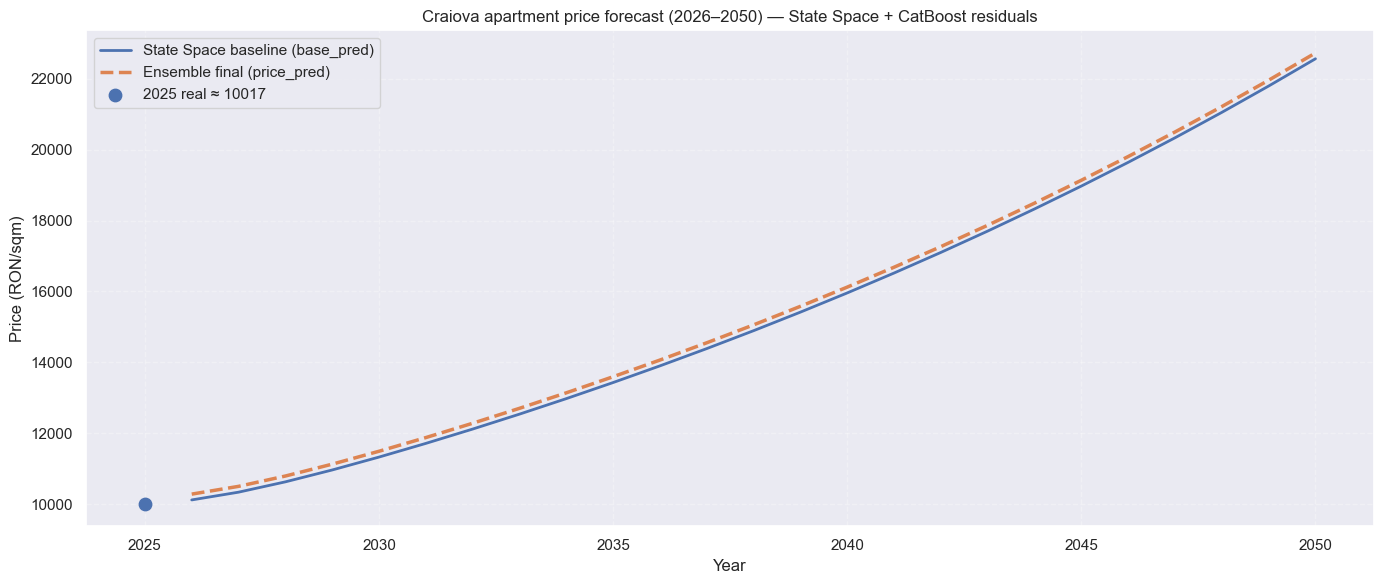

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

df_fc = pd.read_csv("results\ensemble_ss_catboost_forecast_2026_2050.csv")

#load historical to show 2025 real point
df_hist = pd.read_csv("merged_data/full_gen8.csv")

target_col = "price_per_sqm"

p2025 = float(df_hist.loc[df_hist["An"] == 2025, target_col].iloc[0])

plt.figure(figsize=(14, 6))

plt.plot(df_fc["An"], df_fc["base_pred"], linewidth=2, label="State Space baseline (base_pred)")
plt.plot(df_fc["An"], df_fc["price_pred"], linewidth=2.5, linestyle="--", label="Ensemble final (price_pred)")

plt.scatter([2025], [p2025], s=80, label=f"2025 real ≈ {p2025:.0f}")

plt.title("Craiova apartment price forecast (2026–2050) — State Space + CatBoost residuals")
plt.xlabel("Year")
plt.ylabel("Price (RON/sqm)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()